# Brest Cancer Prediction

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.api.types import CategoricalDtype


In [13]:
df = pd.read_csv('../data/bikeshare_train.csv')

In [14]:
df.head()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [15]:
df.describe()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,183.000000,2.498630,6.526027,0.027397,3.008219,0.684932,1.421918,0.486665,0.466835,0.643665,0.191403,3405.761644
std,105.510663,1.110946,3.452584,0.163462,2.006155,0.465181,0.571831,0.189596,0.168836,0.148744,0.076890,1378.753666
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,431.000000
25%,92.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.325000,0.321954,0.538333,0.135583,2132.000000
50%,183.000000,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.479167,0.472846,0.647500,0.186900,3740.000000
75%,274.000000,3.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.656667,0.612379,0.742083,0.235075,4586.000000
max,365.000000,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.849167,0.840896,0.972500,0.507463,6043.000000


In [16]:
df.isna().sum()# sum of all the NA

id            0
season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [18]:
df2 = df.copy()


## k-means

In [17]:
from sklearn.cluster import KMeans 

In [18]:
wcss = []
for i in range(2, 15): # the number of the correct clusters from 2 to 15. usually we start with 10 and see what happen
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)# random_state=0 is the seed. first we define the model without the data 
    kmeans.fit(df.iloc[:,0:8])# now we give the data. in python we start wiht 0. and all the vars without the y
    wcss.append(kmeans.inertia_)# inertia_ tells us the optimal number of clusters
    

In [19]:
df2 = df.copy()

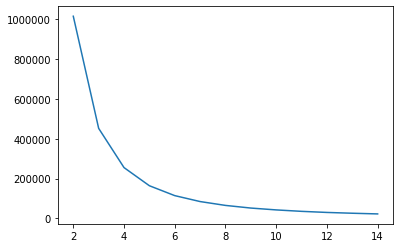

In [20]:
sns.lineplot(x=range(2, 15), y=wcss) # the x is the number of clusters. we can see that there is a pic douwn in number 6. the inertia is the y - describe the differential between the groups

In [21]:
#we saw that 6 is the best value we do again the pair plot but now with the 6 in the n_clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=7)
kmeans.fit(df.iloc[:,0:8])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=7, tol=0.0001, verbose=0)

In [22]:
df2['cluster'] = kmeans.labels_

C:\Users\meir\Downloads\Python\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\meir\Downloads\Python\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


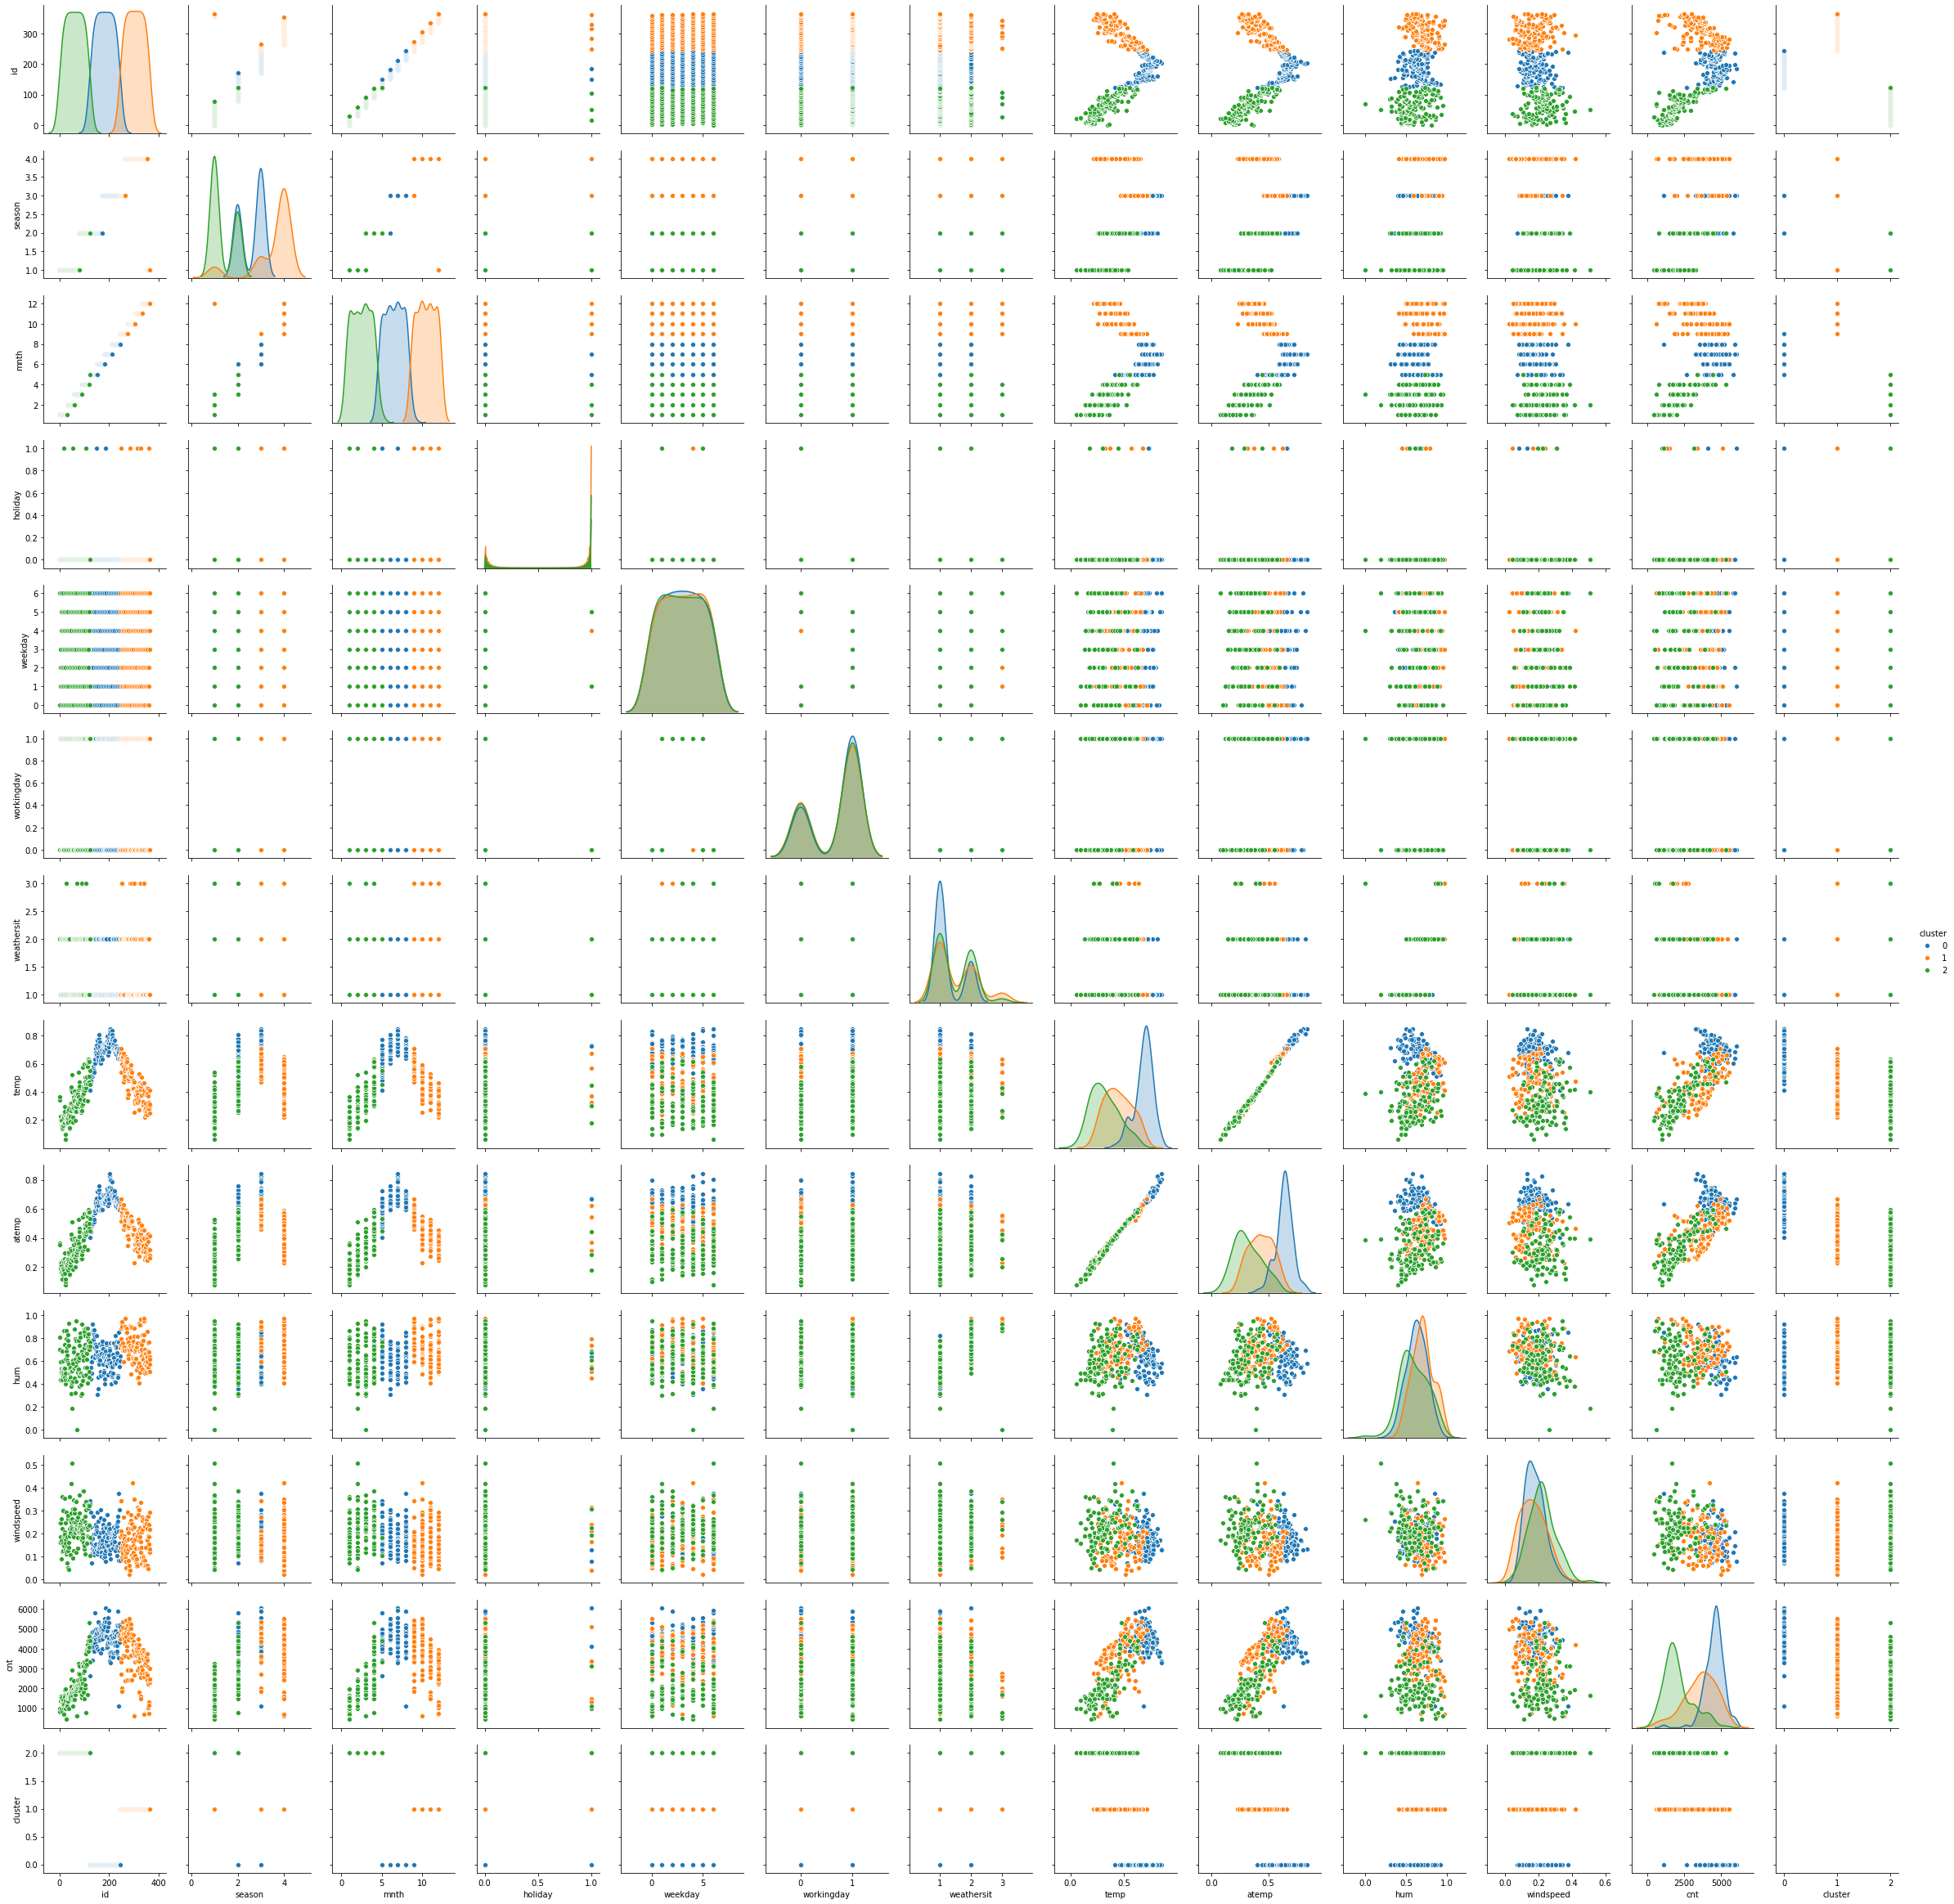

In [23]:
sns.pairplot(df2,hue="cluster")

In [24]:
pd.crosstab(df2.cluster,df2.cnt)# when we want to see the number of data in each cluster and its classification in cluster 0 we have 8 seak and 1 healthy

cnt,431,506,605,623,627,683,705,754,795,801,...,5362,5409,5423,5511,5515,5538,5805,5895,5923,6043
cluster,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,1,1,1,1
1,0,0,0,0,1,0,1,1,0,0,...,0,1,1,1,0,0,0,0,0,0
2,1,1,1,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree, fcluster # lets do clusters by hierarchy. and we use the linkage function

In [26]:
linked = linkage(df.iloc[:,0:8], 'ward') # 'ward' defined the distance. it is one model for this purpose

labelList = range(2, 15) # 15 is again the number of clusters

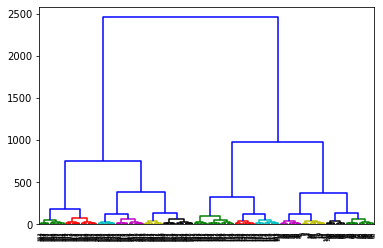

In [27]:
dn = dendrogram(linked,color_threshold=120)# the 120defined me where to cut in order to get 6 


In [29]:
df2['hcluster'] = fcluster(linked, 3, criterion='maxclust')#'hcluster'

In [30]:
pd.crosstab(df2.hcluster,df2.cnt)

cnt,431,506,605,623,627,683,705,754,795,801,...,5362,5409,5423,5511,5515,5538,5805,5895,5923,6043
hcluster,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,1,1,0,0,...,0,1,1,1,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,1,1,0,1,1
3,1,1,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [32]:
pd.crosstab(df2.cluster,df2.hcluster)# Here we want to see if the culsters are closed to each ather 
# but if they will be identical we will not use both of them. 

hcluster,1,2,3
cluster,,,
0,47,75,0
1,121,0,0
2,0,19,103


In [33]:
df2.describe()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,cluster,hcluster
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,183.000000,2.498630,6.526027,0.027397,3.008219,0.684932,1.421918,0.486665,0.466835,0.643665,0.191403,3405.761644,1.000000,1.821918
std,105.510663,1.110946,3.452584,0.163462,2.006155,0.465181,0.571831,0.189596,0.168836,0.148744,0.076890,1378.753666,0.818737,0.844219
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,431.000000,0.000000,1.000000
25%,92.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.325000,0.321954,0.538333,0.135583,2132.000000,0.000000,1.000000
50%,183.000000,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.479167,0.472846,0.647500,0.186900,3740.000000,1.000000,2.000000
75%,274.000000,3.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.656667,0.612379,0.742083,0.235075,4586.000000,2.000000,3.000000
max,365.000000,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.849167,0.840896,0.972500,0.507463,6043.000000,2.000000,3.000000


In [45]:
df2.head()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,cluster,hcluster
0,1,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985,2,3
1,2,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801,2,3
2,3,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349,2,3
3,4,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562,2,3
4,5,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600,2,3


# Partition of the data

In [ ]:
# In pytho we do x and y seperatly

In [34]:
from sklearn.model_selection import train_test_split # we are checking list and test 

In [35]:
nv = ['season','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']# all the vars exept the y 
'season','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed'
nc = ['cluster','hcluster'] # the clusters
yv = 'cnt' # the var y

In [36]:
X = df2.loc[:,nv] # we define here the x wich is all the vars exept the y
y = df2.cnt

In [37]:
X.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900


In [38]:
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40,random_state=4) # here we define the test and train and it should be in the exact order. here we defined the size of the test which is 40%


# Models

### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [53]:
mod1 = LogisticRegression()
mod1.fit(X_train,y_train)# we train the model by the the x and y

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
yhat1 = mod1.predict(X_train)# yhat1 we define the y-hat for the x and we will use it in the y
yhat1

array([6043, 5312, 3974, 4744, 4195, 4195, 4195, 1167, 4195, 3974, 5312,
        705, 3368, 4195, 3485, 3485, 4401,  705,  705, 3071, 2431, 1693,
       5312, 3974, 5312, 5312, 4195, 4195, 1501, 5117, 3190, 5312, 5312,
       4401, 5041, 3974, 4940, 4195, 4195, 4195, 2416, 4195, 4744, 4401,
       1167, 5312, 2739, 3126, 1167, 4195, 5312, 4195, 4401, 1944, 4195,
       4195, 4195, 4401, 3190, 3520, 3190, 5312, 3190, 3974, 5041, 1098,
       3190, 3351, 5312, 1501, 5312, 4744, 1693, 3974, 3190, 3190, 1167,
       4401,  506,  795, 4195, 4195, 4401, 5312, 4401, 4195,  795, 3485,
       1842, 4195, 4195,  705, 2431, 4195, 4401, 4195, 5312, 2431,  506,
       4195,  959, 4195, 3785, 1842, 4195, 4195, 4195, 4401, 2431,  795,
       4195, 2431,  705, 5312, 3974, 4195, 2416, 3974, 4195, 5312, 4195,
       3785, 1693, 3520, 4195, 4195, 1167, 4195, 3974, 4401, 1317, 1842,
       2739, 1011, 5312, 2739, 3485, 5312, 4195, 4195, 5312, 5312, 5312,
       1501, 4744,  506, 4195, 5312, 4195, 3974, 19

In [55]:
yprob1 = mod1.predict_proba(X_train) # the firs column is the probability to get 1 (to be healthy) and the second is to be 2
yprob1

array([[2.42832345e-05, 2.38589106e-05, 1.35282837e-02, ...,
        5.42337161e-03, 3.78446821e-03, 2.65301057e-02],
       [2.68521558e-04, 3.09120711e-05, 4.58410777e-03, ...,
        4.63772707e-03, 1.01325924e-02, 1.23612422e-03],
       [9.37636793e-04, 4.56852980e-04, 8.65481809e-03, ...,
        3.25210249e-03, 7.75654531e-03, 2.12515645e-03],
       ...,
       [1.38208947e-05, 5.27923046e-06, 7.44388232e-03, ...,
        7.31303791e-03, 3.59130361e-03, 8.33348863e-03],
       [2.72486660e-04, 2.43065039e-05, 3.58055473e-03, ...,
        4.64756779e-03, 1.22460943e-02, 1.47769465e-03],
       [3.79730232e-04, 4.54733578e-04, 1.34094882e-02, ...,
        5.88682313e-03, 3.31337723e-03, 5.96997274e-03]])

In [56]:
pd.crosstab(y_train,yhat1)# the col row is the model and the classification column is the real

col_0,431,506,705,795,959,981,985,1011,1098,1107,...,3974,4195,4401,4744,4940,5041,5117,5312,5511,6043
cnt,,,,,,,,,,,,,,,,,,,,,
431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
506,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
705,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
795,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
822,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5511,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5895,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [57]:
### Accuracy:
mod1.score(X_train,y_train) # here we give the score

0.1415525114155251

In [58]:
yhat2 = mod1.predict(X_test)# no
print(mod1.score(X_test,y_test))
pd.crosstab(y_test,yhat2)

0.0


col_0,506,705,795,959,981,1011,1107,1162,1167,1317,...,3071,3190,3520,3974,4195,4294,4401,4649,4744,5312
cnt,,,,,,,,,,,,,,,,,,,,,
605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
623,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
627,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
683,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
754,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5342,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
### AUC
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train, yhat1))
print(roc_auc_score(y_test, yhat2))

ValueError: multiclass format is not supported

In [50]:
res = {1:{'model':'Logistic Regression - base model',
           'accuracy-Train':mod1.score(X_train,y_train),
           'accuracy-Test':mod1.score(X_test,y_test),
           'AUC-train':roc_auc_score(y_train, yhat1),
           'AUC-test':roc_auc_score(y_test, yhat2)
      }}

In [51]:
#res[2] = {'model':'Logistic Regression - base model',
#           'accuracy-Train':mod1.score(X_train,y_train),
#           'accuracy-Test':mod1.score(X_test,y_test),
#           'AUC-train':roc_auc_score(y_train, yhat1),
#           'AUC-test':roc_auc_score(y_test, yhat2)
#      }

In [295]:
res

{1: {'model': 'Logistic Regression - base model',
  'accuracy-Train': 0.7391304347826086,
  'accuracy-Test': 0.7446808510638298,
  'AUC-train': 0.7269230769230769,
  'AUC-test': 0.7327272727272727},
 2: {'model': 'Logistic Regression - base model',
  'accuracy-Train': 0.7391304347826086,
  'accuracy-Test': 0.7446808510638298,
  'AUC-train': 0.7269230769230769,
  'AUC-test': 0.7327272727272727}}